In [2]:
%cd /mnt/storage/maxenis/coptic-machine-translation

/mnt/storage/maxenis/coptic-machine-translation


In [35]:
import pandas as pd
import datasets
import huggingface_model
from config_consts import *
from tqdm import tqdm
import transformers

In [5]:
data = pd.read_csv('./datasets/clean_monolingual_data.csv')
data

,Unnamed: 0,eng,norm_group,norm,func,pos,arabic,meta::translation,meta::title,meta::source,meta::corpus,unnormalized,norm_romanized,norm_group_romanized,unnormalized_romanized,norm_greekified,norm_group_greekified,unnormalized_greekified
0,0,...,ⲉⲥⲁⲡⲁⲧⲁⲙⲙⲟⲥ ⲙⲁⲩⲁⲁⲥ ⲙⲛϩⲉⲛⲙⲏⲏϣⲉ ⲛⲁⲧϩⲏⲧ ⲛⲧϩⲉ ⲛϩⲉⲛ...,ⲉ ⲥ ⲁⲡⲁⲧⲁ ⲙⲙⲟ ⲥ ⲙⲁⲩⲁⲁ ⲥ ⲙⲛ ϩⲉⲛ ⲙⲏⲏϣⲉ ⲛ ⲁⲧϩⲏⲧ ⲛ...,mark nsubj root case obj advmod det cc det obl...,CCIRC PPERS V PREP PPERO IMOD PPERO PREP ART N...,NaN,none,Apa Johannes Canons: FA143-158,"Diliana Atanassova, The Canons of Apa John the...",johannes.canons,ⲉⲥⲁⲡⲁⲧⲁⲙⲙⲟⲥⲙⲁⲩⲁⲁⲥⲙⲛϩⲉⲛⲙⲏⲏϣⲉⲛⲁⲧϩⲏⲧⲛⲧϩⲉⲛϩⲉⲛⲧⲃⲛⲟⲟ...,eie s apata mmo s mauaaa s mn heien mhhsheie n...,eiesapatammos mauaaas mnheienmhhsheie nathht n...,eiesapatammosmauaaasmnheienmhhsheienathhtnthei...,ε σ απατα μμο σ μαυαα σ μν hεν μηηsε ν ατhητ ν...,εσαπαταμμοσ μαυαασ μνhενμηηsε νατhητ ντhε νhεν...,εσαπαταμμοσμαυαασμνhενμηηsενατhητντhενhεντβνοο...
1,1,...,ⲙⲟⲛⲟⲛ ⲉⲧⲃⲉⲧⲙⲛⲧϫⲁⲥⲓϩⲏⲧ ⲕⲁⲧⲁⲧϩⲉ ⲛⲧⲁⲓⲣϣⲣⲡ ⲛϫⲟⲟⲥ ...,ⲙⲟⲛⲟⲛ ⲉⲧⲃⲉ ⲧ ⲙⲛⲧϫⲁⲥⲓϩⲏⲧ ⲕⲁⲧⲁ ⲧ ϩⲉ ⲛⲧ ⲁ ⲓ ⲣϣⲣⲡ...,advmod case det root punct case det obl mark a...,CONJ PREP ART N PUNCT PREP ART N CREL APST PPE...,NaN,none,Apa Johannes Canons: FA143-158,"Diliana Atanassova, The Canons of Apa John the...",johannes.canons,ⲙⲟⲛⲟⲛⲉⲧⲃⲉⲧⲙⲛⲧϫⲁⲥⲓϩⲏⲧⲕⲁⲧⲁⲧϩⲉⲛⲧⲁⲓⲣϣⲣⲡⲛϫⲟⲟⲥⲁⲩⲱⲧⲙⲛ...,monon eietveie t mntgasiauhht kata t heie nt ...,monon eietveietmntgasiauhht katatheie ntaiaur...,mononeietveietmntgasiauhhtkatatheientaiaurshrp...,μονον ετβε τ μντjασιhητ κατα τ hε ντ α ι ρsρπ...,μονον ετβετμντjασιhητ κατατhε νταιρsρπ νjοοσ ...,μονονετβετμντjασιhητκατατhενταιρsρπνjοοσαυωτμν...
2,2,...,ⲛⲓⲙ ϭⲉ ⲡⲉⲧⲛⲁϣϫⲓ ⲏ ⲡⲉϫⲓⲛⲛϣⲟⲣⲡ ⲛⲛⲉⲛⲧⲁⲩⲧⲁⲕⲟ ⲉⲁⲩⲃⲱ...,ⲛⲓⲙ ϭⲉ ⲡ ⲉⲧ ⲛⲁ ϣ ϫⲓ ⲏ ⲡⲉ ϫⲓⲛ ⲛ ϣⲟⲣⲡ ⲛ ⲛ ⲉⲛⲧ ⲁ ...,root advmod nsubj mark aux aux csubj cc det ca...,PINT PTC COP CREL FUT V V CONJ COP PREP ART N ...,NaN,none,Apa Johannes Canons: FA143-158,"Diliana Atanassova, The Canons of Apa John the...",johannes.canons,ⲛⲓⲙϭⲉⲡⲉⲧⲛⲁϣϫⲓⲏⲡⲉϫⲓⲛⲛϣⲟⲣⲡⲛⲛⲉⲛⲧⲁⲩⲧⲁⲕⲟⲉⲁⲩⲃⲱⲕⲉⲡⲉⲥⲏ...,niaum sheie p eiet na sh giau h peie giaun n s...,niaum sheie peietnashgiau h peiegiaunnshorp nn...,niaumsheiepeietnashgiauhpeiegiaunnshorpnneient...,νιμ cε π ετ να s jι η πε jιν ν sορπ ν ν εντ α ...,νιμ cε πετναsjι η πεjιννsορπ ννενταυτακο εαυβω...,νιμcεπετναsjιηπεjιννsορπννενταυτακοεαυβωκεπεση...
3,3,...,ϫⲉⲁⲩⲙⲟⲟϣⲉ ϩⲛⲧⲉϩⲓⲏ ⲛⲧⲙⲛⲧϫⲁⲥⲓϩⲏⲧ ⲁⲩⲱ ⲉⲁⲩϣⲱⲡⲉ ϩⲛ...,ϫⲉ ⲁ ⲩ ⲙⲟⲟϣⲉ ϩⲛ ⲧⲉ ϩⲓⲏ ⲛ ⲧ ⲙⲛⲧϫⲁⲥⲓϩⲏⲧ ⲁⲩⲱ ⲉ ⲁ...,mark aux nsubj root case det obl case det nmod...,CONJ APST PPERS V PREP ART N PREP ART N PUNCT ...,NaN,none,Apa Johannes Canons: FA143-158,"Diliana Atanassova, The Canons of Apa John the...",johannes.canons,ϫⲉⲁⲩⲙⲟⲟϣⲉϩⲛⲧⲉϩⲓⲏⲛⲧⲙⲛⲧϫⲁⲥⲓϩⲏⲧⲁⲩⲱⲉⲁⲩϣⲱⲡⲉϩⲛⲟⲩⲙⲛⲧⲁ...,geie a ua moosheie hn teie hiauh n t mntgasiau...,geieauamoosheie hnteiehiauh ntmntgasiauhht au...,geieauamoosheiehnteiehiauhntmntgasiauhhtauaoou...,jε α υ μοοsε hν τε hιη ν τ μντjασιhητ αυω ε α...,jεαυμοοsε hντεhιη ντμντjασιhητ αυω εαυsωπε hν...,jεαυμοοsεhντεhιηντμντjασιhηταυωεαυsωπεhνουμντα...
4,4,...,ⲕⲁⲓ ⲅⲁⲣ ⲙⲛⲛⲥⲁⲛⲉⲛⲧⲁⲡϫⲟⲉⲓⲥ ϫⲟⲟⲩ ⲧⲏⲣⲟⲩ ϫⲓⲛⲛϣⲟⲣⲡ ⲉ...,ⲕⲁⲓ ⲅⲁⲣ ⲙⲛⲛⲥⲁ ⲛ ⲉⲛⲧ ⲁ ⲡ ϫⲟⲉⲓⲥ ϫⲟⲟ ⲩ ⲧⲏⲣ ⲟⲩ ϫⲓⲛ...,cc advmod case root mark aux det nsubj acl:rel...,CONJ PTC PREP ART CREL APST ART N V PPERO IMOD...,NaN,none,Apa Johannes Canons: FA143-158,"Diliana Atanassova, The Canons of Apa John the...",johannes.canons,ⲕⲁⲓⲅⲁⲣⲙⲛⲛⲥⲁⲛⲉⲛⲧⲁⲡϫⲟⲉⲓⲥϫⲟⲟⲩⲧⲏⲣⲟⲩϫⲓⲛⲛϣⲟⲣⲡⲉⲓⲧⲉϩⲛϩ...,kaiau gar mnnsa n eient a p goeieiaus goo ua t...,kaiau gar mnnsaneientapgoeieiaus gooua throua ...,kaiaugarmnnsaneientapgoeieiausgoouathrouagiaun...,και γαρ μννσα ν εντ α π jοεισ jοο υ τηρ ου jιν...,και γαρ μννσανενταπjοεισ jοου τηρου jιννsορπ ε...,καιγαρμννσανενταπjοεισjοουτηρουjιννsορπειτεhνh...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5736,5736,…,ϫⲛⲙⲙⲟⲛ. ⲉϣⲁⲛⲃⲱⲕ ⲉϩⲣⲁⲓ ⲉϩⲉⲛⲫⲱⲥⲥⲁ .,ϫⲛ ⲙⲙⲟⲛ. ⲉ ϣⲁ ⲛ ⲃⲱⲕ ⲉϩⲣⲁⲓ ⲉ ϩⲉⲛ ⲫⲱⲥⲥⲁ .,advmod advmod punct mark aux nsubj root advmod...,CONJ PTC PUNCT CCIRC AAOR PPERS V ADV PREP ART...,NaN,none,I See Your Eagerness: XJ 77-86,NaN,NaN,ϫⲛⲙⲙⲟⲛⲉϣⲁⲛⲃⲱⲕⲉϩⲣⲁⲓⲉϩⲉⲛⲫⲱⲥⲥⲁ,gn mmon. eie sha n voouk eiehraiau eie heien f...,gnmmon. eieshanvoouk eiehraiau eieheienfooussa .,gnmmon

In [6]:
model = huggingface_model.HuggingFaceTranslationModel.from_pretrained('models/hf/fifth_attempt-norm_romanized-finetuned-cop-eng')


/home/bizon/anaconda3/envs/coptic/lib/python3.11/site-packages/transformers/models/marian/tokenization_marian.py:194: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [60]:
def add_translation_to_df(df: pd.DataFrame, model, src_col, tgt_col, config=BEAM_GENERATION_CONFIG):
    # Add column if it doesn't exist for translation and confidence
    conf_col = tgt_col + "_confidence"
    if tgt_col not in df.columns:
      df[tgt_col] = ""
    if conf_col not in df.columns:
      df[conf_col] = 0.0

    for i, row in tqdm(df.iterrows(), total=df.shape[0], position=0, leave=True):
      # Modify row in place to add translation
      pred, conf = model.translate(row[src_col], config=config, output_confidence=True)
      df.at[i, tgt_col] = pred
      df.at[i, conf_col] = conf

In [63]:
data = data.drop(["Unnamed: 0", "eng", "func", "pos", "arabic", "unnormalized", "unnormalized_romanized", "norm_group_romanized", "unnormalized_greekified", "norm_group_greekified", "norm_greekified", "meta::translation", "eng_confidence"], axis=1, errors="ignore")

In [64]:
data.head()

,norm_group,norm,meta::title,meta::source,meta::corpus,norm_romanized
0,ⲉⲥⲁⲡⲁⲧⲁⲙⲙⲟⲥ ⲙⲁⲩⲁⲁⲥ ⲙⲛϩⲉⲛⲙⲏⲏϣⲉ ⲛⲁⲧϩⲏⲧ ⲛⲧϩⲉ ⲛϩⲉⲛ...,ⲉ ⲥ ⲁⲡⲁⲧⲁ ⲙⲙⲟ ⲥ ⲙⲁⲩⲁⲁ ⲥ ⲙⲛ ϩⲉⲛ ⲙⲏⲏϣⲉ ⲛ ⲁⲧϩⲏⲧ ⲛ...,Apa Johannes Canons: FA143-158,"Diliana Atanassova, The Canons of Apa John the...",johannes.canons,eie s apata mmo s mauaaa s mn heien mhhsheie n...
1,ⲙⲟⲛⲟⲛ ⲉⲧⲃⲉⲧⲙⲛⲧϫⲁⲥⲓϩⲏⲧ ⲕⲁⲧⲁⲧϩⲉ ⲛⲧⲁⲓⲣϣⲣⲡ ⲛϫⲟⲟⲥ ...,ⲙⲟⲛⲟⲛ ⲉⲧⲃⲉ ⲧ ⲙⲛⲧϫⲁⲥⲓϩⲏⲧ ⲕⲁⲧⲁ ⲧ ϩⲉ ⲛⲧ ⲁ ⲓ ⲣϣⲣⲡ...,Apa Johannes Canons: FA143-158,"Diliana Atanassova, The Canons of Apa John the...",johannes.canons,monon eietveie t mntgasiauhht kata t heie nt ...
2,ⲛⲓⲙ ϭⲉ ⲡⲉⲧⲛⲁϣϫⲓ ⲏ ⲡⲉϫⲓⲛⲛϣⲟⲣⲡ ⲛⲛⲉⲛⲧⲁⲩⲧⲁⲕⲟ ⲉⲁⲩⲃⲱ...,ⲛⲓⲙ ϭⲉ ⲡ ⲉⲧ ⲛⲁ ϣ ϫⲓ ⲏ ⲡⲉ ϫⲓⲛ ⲛ ϣⲟⲣⲡ ⲛ ⲛ ⲉⲛⲧ ⲁ ...,Apa Johannes Canons: FA143-158,"Diliana Atanassova, The Canons of Apa John the...",johannes.canons,niaum sheie p eiet na sh giau h peie giaun n s...
3,ϫⲉⲁⲩⲙⲟⲟϣⲉ ϩⲛⲧⲉϩⲓⲏ ⲛⲧⲙⲛⲧϫⲁⲥⲓϩⲏⲧ ⲁⲩⲱ ⲉⲁⲩϣⲱⲡⲉ ϩⲛ...,ϫⲉ ⲁ ⲩ ⲙⲟⲟϣⲉ ϩⲛ ⲧⲉ ϩⲓⲏ ⲛ ⲧ ⲙⲛⲧϫⲁⲥⲓϩⲏⲧ ⲁⲩⲱ ⲉ ⲁ...,Apa Johannes Canons: FA143-158,"Diliana Atanassova, The Canons of Apa John the...",johannes.canons,geie a ua moosheie hn teie hiauh n t mntgasiau...
4,ⲕⲁⲓ ⲅⲁⲣ ⲙⲛⲛⲥⲁⲛⲉⲛⲧⲁⲡϫⲟⲉⲓⲥ ϫⲟⲟⲩ ⲧⲏⲣⲟⲩ ϫⲓⲛⲛϣⲟⲣⲡ ⲉ...,ⲕⲁⲓ ⲅⲁⲣ ⲙⲛⲛⲥⲁ ⲛ ⲉⲛⲧ ⲁ ⲡ ϫⲟⲉⲓⲥ ϫⲟⲟ ⲩ ⲧⲏⲣ ⲟⲩ ϫⲓⲛ...,Apa Johannes Canons: FA143-158,"Diliana Atanassova, The Canons of Apa John the...",johannes.canons,kaiau gar mnnsa n eient a p goeieiaus goo ua t...


In [41]:
transformers.logging.set_verbosity_error()

In [65]:
add_translation_to_df(data, model, 'norm_romanized', 'eng')

100%|██████████| 5741/5741 [43:05<00:00,  2.22it/s]  


In [66]:
data.head()

,norm_group,norm,meta::title,meta::source,meta::corpus,norm_romanized,eng,eng_confidence
0,ⲉⲥⲁⲡⲁⲧⲁⲙⲙⲟⲥ ⲙⲁⲩⲁⲁⲥ ⲙⲛϩⲉⲛⲙⲏⲏϣⲉ ⲛⲁⲧϩⲏⲧ ⲛⲧϩⲉ ⲛϩⲉⲛ...,ⲉ ⲥ ⲁⲡⲁⲧⲁ ⲙⲙⲟ ⲥ ⲙⲁⲩⲁⲁ ⲥ ⲙⲛ ϩⲉⲛ ⲙⲏⲏϣⲉ ⲛ ⲁⲧϩⲏⲧ ⲛ...,Apa Johannes Canons: FA143-158,"Diliana Atanassova, The Canons of Apa John the...",johannes.canons,eie s apata mmo s mauaaa s mn heien mhhsheie n...,"She deceives herself, and many foolish ones, a...",0.846055
1,ⲙⲟⲛⲟⲛ ⲉⲧⲃⲉⲧⲙⲛⲧϫⲁⲥⲓϩⲏⲧ ⲕⲁⲧⲁⲧϩⲉ ⲛⲧⲁⲓⲣϣⲣⲡ ⲛϫⲟⲟⲥ ...,ⲙⲟⲛⲟⲛ ⲉⲧⲃⲉ ⲧ ⲙⲛⲧϫⲁⲥⲓϩⲏⲧ ⲕⲁⲧⲁ ⲧ ϩⲉ ⲛⲧ ⲁ ⲓ ⲣϣⲣⲡ...,Apa Johannes Canons: FA143-158,"Diliana Atanassova, The Canons of Apa John the...",johannes.canons,monon eietveie t mntgasiauhht kata t heie nt ...,"Not only because of pride, as I have already s...",0.833208
2,ⲛⲓⲙ ϭⲉ ⲡⲉⲧⲛⲁϣϫⲓ ⲏ ⲡⲉϫⲓⲛⲛϣⲟⲣⲡ ⲛⲛⲉⲛⲧⲁⲩⲧⲁⲕⲟ ⲉⲁⲩⲃⲱ...,ⲛⲓⲙ ϭⲉ ⲡ ⲉⲧ ⲛⲁ ϣ ϫⲓ ⲏ ⲡⲉ ϫⲓⲛ ⲛ ϣⲟⲣⲡ ⲛ ⲛ ⲉⲛⲧ ⲁ ...,Apa Johannes Canons: FA143-158,"Diliana Atanassova, The Canons of Apa John the...",johannes.canons,niaum sheie p eiet na sh giau h peie giaun n s...,Who shall be able to receive or to receive fro...,0.808876
3,ϫⲉⲁⲩⲙⲟⲟϣⲉ ϩⲛⲧⲉϩⲓⲏ ⲛⲧⲙⲛⲧϫⲁⲥⲓϩⲏⲧ ⲁⲩⲱ ⲉⲁⲩϣⲱⲡⲉ ϩⲛ...,ϫⲉ ⲁ ⲩ ⲙⲟⲟϣⲉ ϩⲛ ⲧⲉ ϩⲓⲏ ⲛ ⲧ ⲙⲛⲧϫⲁⲥⲓϩⲏⲧ ⲁⲩⲱ ⲉ ⲁ...,Apa Johannes Canons: FA143-158,"Diliana Atanassova, The Canons of Apa John the...",johannes.canons,geie a ua moosheie hn teie hiauh n t mntgasiau...,"For they have walked in the way of pride, and ...",0.828068
4,ⲕⲁⲓ ⲅⲁⲣ ⲙⲛⲛⲥⲁⲛⲉⲛⲧⲁⲡϫⲟⲉⲓⲥ ϫⲟⲟⲩ ⲧⲏⲣⲟⲩ ϫⲓⲛⲛϣⲟⲣⲡ ⲉ...,ⲕⲁⲓ ⲅⲁⲣ ⲙⲛⲛⲥⲁ ⲛ ⲉⲛⲧ ⲁ ⲡ ϫⲟⲉⲓⲥ ϫⲟⲟ ⲩ ⲧⲏⲣ ⲟⲩ ϫⲓⲛ...,Apa Johannes Canons: FA143-158,"Diliana Atanassova, The Canons of Apa John the...",johannes.canons,kaiau gar mnnsa n eient a p goeieiaus goo ua t...,For after all things that the Lord spoke in pa...,0.822024


In [67]:
data.to_csv('./datasets/monolingual_data_norm_romanized_translated.csv')

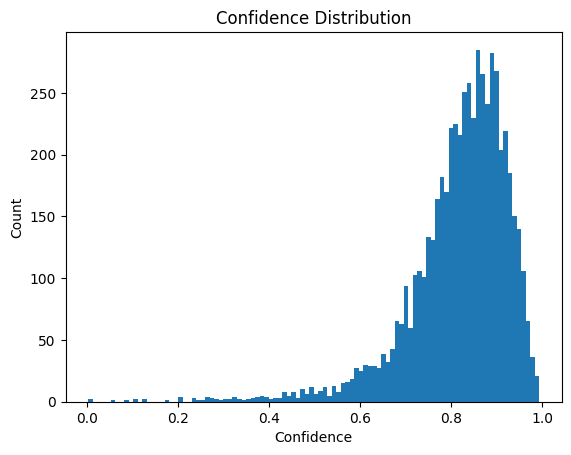

In [69]:
# Plot confidence scores to show distribution
import matplotlib.pyplot as plt
import numpy as np

plt.hist(data['eng_confidence'], bins=100)
plt.xlabel('Confidence')
plt.ylabel('Count')
plt.title('Confidence Distribution')
plt.show()

In [84]:
data.head()

,norm_group,norm,meta::title,meta::source,meta::corpus,norm_romanized,eng,eng_confidence
0,ⲉⲥⲁⲡⲁⲧⲁⲙⲙⲟⲥ ⲙⲁⲩⲁⲁⲥ ⲙⲛϩⲉⲛⲙⲏⲏϣⲉ ⲛⲁⲧϩⲏⲧ ⲛⲧϩⲉ ⲛϩⲉⲛ...,ⲉ ⲥ ⲁⲡⲁⲧⲁ ⲙⲙⲟ ⲥ ⲙⲁⲩⲁⲁ ⲥ ⲙⲛ ϩⲉⲛ ⲙⲏⲏϣⲉ ⲛ ⲁⲧϩⲏⲧ ⲛ...,Apa Johannes Canons: FA143-158,"Diliana Atanassova, The Canons of Apa John the...",johannes.canons,eie s apata mmo s mauaaa s mn heien mhhsheie n...,"She deceives herself, and many foolish ones, a...",0.846055
1,ⲙⲟⲛⲟⲛ ⲉⲧⲃⲉⲧⲙⲛⲧϫⲁⲥⲓϩⲏⲧ ⲕⲁⲧⲁⲧϩⲉ ⲛⲧⲁⲓⲣϣⲣⲡ ⲛϫⲟⲟⲥ ...,ⲙⲟⲛⲟⲛ ⲉⲧⲃⲉ ⲧ ⲙⲛⲧϫⲁⲥⲓϩⲏⲧ ⲕⲁⲧⲁ ⲧ ϩⲉ ⲛⲧ ⲁ ⲓ ⲣϣⲣⲡ...,Apa Johannes Canons: FA143-158,"Diliana Atanassova, The Canons of Apa John the...",johannes.canons,monon eietveie t mntgasiauhht kata t heie nt ...,"Not only because of pride, as I have already s...",0.833208
2,ⲛⲓⲙ ϭⲉ ⲡⲉⲧⲛⲁϣϫⲓ ⲏ ⲡⲉϫⲓⲛⲛϣⲟⲣⲡ ⲛⲛⲉⲛⲧⲁⲩⲧⲁⲕⲟ ⲉⲁⲩⲃⲱ...,ⲛⲓⲙ ϭⲉ ⲡ ⲉⲧ ⲛⲁ ϣ ϫⲓ ⲏ ⲡⲉ ϫⲓⲛ ⲛ ϣⲟⲣⲡ ⲛ ⲛ ⲉⲛⲧ ⲁ ...,Apa Johannes Canons: FA143-158,"Diliana Atanassova, The Canons of Apa John the...",johannes.canons,niaum sheie p eiet na sh giau h peie giaun n s...,Who shall be able to receive or to receive fro...,0.808876
3,ϫⲉⲁⲩⲙⲟⲟϣⲉ ϩⲛⲧⲉϩⲓⲏ ⲛⲧⲙⲛⲧϫⲁⲥⲓϩⲏⲧ ⲁⲩⲱ ⲉⲁⲩϣⲱⲡⲉ ϩⲛ...,ϫⲉ ⲁ ⲩ ⲙⲟⲟϣⲉ ϩⲛ ⲧⲉ ϩⲓⲏ ⲛ ⲧ ⲙⲛⲧϫⲁⲥⲓϩⲏⲧ ⲁⲩⲱ ⲉ ⲁ...,Apa Johannes Canons: FA143-158,"Diliana Atanassova, The Canons of Apa John the...",johannes.canons,geie a ua moosheie hn teie hiauh n t mntgasiau...,"For they have walked in the way of pride, and ...",0.828068
4,ⲕⲁⲓ ⲅⲁⲣ ⲙⲛⲛⲥⲁⲛⲉⲛⲧⲁⲡϫⲟⲉⲓⲥ ϫⲟⲟⲩ ⲧⲏⲣⲟⲩ ϫⲓⲛⲛϣⲟⲣⲡ ⲉ...,ⲕⲁⲓ ⲅⲁⲣ ⲙⲛⲛⲥⲁ ⲛ ⲉⲛⲧ ⲁ ⲡ ϫⲟⲉⲓⲥ ϫⲟⲟ ⲩ ⲧⲏⲣ ⲟⲩ ϫⲓⲛ...,Apa Johannes Canons: FA143-158,"Diliana Atanassova, The Canons of Apa John the...",johannes.canons,kaiau gar mnnsa n eient a p goeieiaus goo ua t...,For after all things that the Lord spoke in pa...,0.822024


In [99]:
parallel_data = pd.read_csv("datasets/third_clean_data.csv")

In [115]:
uq = set(parallel_data["meta::title"].unique())
# filter titles in uq

non_shared_data = data[~data["meta::title"].isin(uq)]

In [128]:
rows = non_shared_data[non_shared_data["meta::title"] == "Pistis Sophia Book 2 Part 3"]

In [131]:
# Show full text of row
for i, r in rows.iterrows():
  print(i, r["meta::title"], r["meta::source"], r["eng"])

1952 Pistis Sophia Book 2 Part 3 <a href='http://marcion.sourceforge.net/'>Marcion project</a>, <a href='https://archive.org/details/pistissophiaopus0000unse/page/n29/mode/2up'>Archive.org</a> saying, 'Blessed is he who comes in the name of the Lord! Hosanna in the highest!''
1953 Pistis Sophia Book 2 Part 3 <a href='http://marcion.sourceforge.net/'>Marcion project</a>, <a href='https://archive.org/details/pistissophiaopus0000unse/page/n29/mode/2up'>Archive.org</a> And again, Thou didst deliver me by Thy command, and Thou didst bring me into the places which are below, and the word which Thou didst say through Solomon, 'The one who brought up those who were in the midst, and taught me,' is the word which Faith spake with wisdom, saying, 'And also through Thee, the clay which was in the midst of my strength made perfect, and I saw it.
1954 Pistis Sophia Book 2 Part 3 <a href='http://marcion.sourceforge.net/'>Marcion project</a>, <a href='https://archive.org/details/pistissophiaopus0000u

In [96]:
data.iloc[1374]

norm_group        ⲁⲩⲱ ⲉϥϣⲁⲛϣⲱⲡⲉ ⲛϭⲓⲡⲁⲣⲓⲑⲙⲟⲥ ⲛⲧⲉⲯⲏⲫⲟⲥ ⲙⲙⲉⲗⲭⲓⲥⲉⲇⲉⲕ...
norm              ⲁⲩⲱ ⲉϥϣⲁⲛ ϣⲱⲡⲉ ⲛϭⲓ ⲡ ⲁⲣⲓⲑⲙⲟⲥ ⲛ ⲧⲉ ⲯⲏⲫⲟⲥ ⲙ ⲙⲉⲗⲭ...
meta::title                             Pistis Sophia Book 1 Part 3
meta::source      <a href='http://marcion.sourceforge.net/'>Marc...
meta::corpus                                          pistis.sophia
norm_romanized    auaoou eiefshan shooupeie nshiau p ariauthmos ...
eng               And when the Arithmianus had come into the sou...
eng_confidence                                             0.833266
Name: 1374, dtype: object